# Lost in a Hyperspace: ML Regression challenge

<img src="https://drive.google.com/uc?id=12wfE98jwFoXy8H0rKbJvFjGj1QxxdDWd" width="750">



## Story Background
Congratulations on your promotion to Principal Engineering Detective! Your impressive work on the previous task has earned you this exciting new challenge.
Now, you are entrusted with the ancient and mesmerizing Glowing Hypercubes, which share some intriguing characteristics with the "Pulse of the Machine" widgets from your last mission (refer to Important Tips for details).
Your mission is to unravel the mysteries of these Glowing Hypercubes by predicting three vital properties using the provided data.
## Objective and Limitations
- Your ultimate goal is to effectively predicts three properties of the Glowing Hypercubes
- Every Glowing Hypercube is represented by the (5 x 5 x 5 x 6) array with lots of symmetries and unique properties (see Important tips section for details)
- You need to engineer a small number of features from the Glowing Hypercube data, since  efficient factory procedures allow you to **only use Linear Regression** as a model, with no hyperparameters change allowed. You are also limited by 300 features for each task.
- Your success will be measured by Root Mean Square Error metric for each feature independently and is translated into the score on the leaderboard.
- Note that different features have different weights in the final score. See `SCALING_WEIGHTS` variable for details. After scaling, to make a single score number, we will average normalized RMSEs for each property.
- Your solution for each task should not exceed 5 minutes for feature generation, training, and inference on the standard Colab non-GPU instance.
- Share the `ml_feature_0.txt`, `ml_feature_1.txt`, and `ml_feature_2.txt` files with us, and don't forget to supply your Google Colab as well

## Important Tips

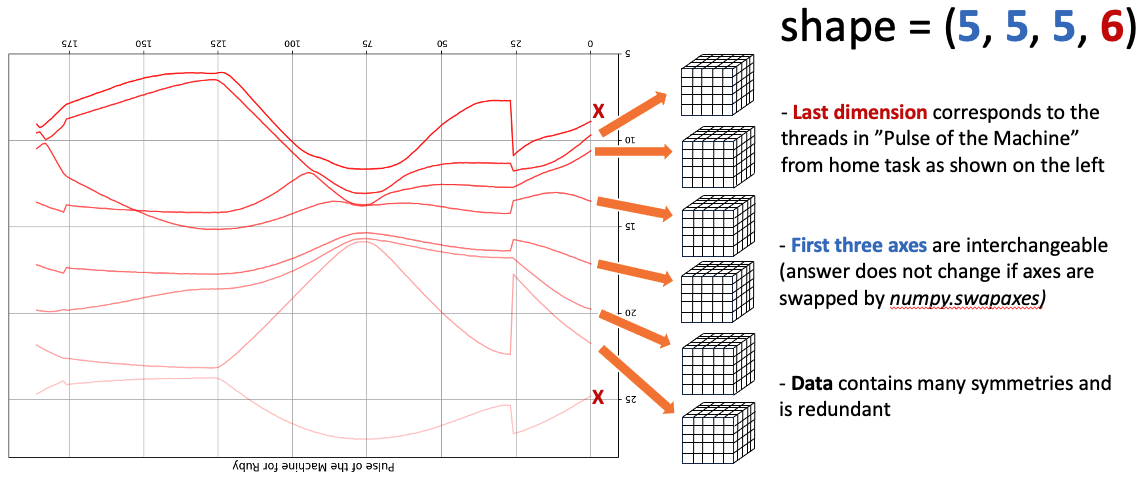

- Linear Regression documentation
  - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

- Handy Numpy functions:
  - https://numpy.org/doc/stable/reference/generated/numpy.swapaxes.html
  - https://numpy.org/doc/stable/reference/generated/numpy.ravel.html
  - https://numpy.org/doc/stable/reference/generated/numpy.reshape.html

- Root Mean Square Error
  - https://en.wikipedia.org/wiki/Root_mean_square_deviation

## Clarification of the methods' usage

Methods' usage limitations mostly resemble the ones for the home task, namely:

- Mind the time limits. These are separate for each forecasting model, and suggest non-GPU instance. This time includes feature generation, training, and inference on the validation/test set. Data analysis, feature search and selection are not subject to the time limitation

- Supervised neural networks (and any supervised models: LDA, boosting trees, etc) are not allowed as a feature extractor. Usage of simpler supervised models (e.g., ensembles on trees, linear regression) for the feature selection is allowed, given the model not being used as a feature extractor. Unsupervised learning is allowed (including autoencoders).

- Usage of pretrained models or auto ML solutions is not allowed. Libraries that automatically sort through various approaches (including unsupervised ones) for the users are not allowed as well.

- Given the time constraints, Colab notebooks should be as reproducible as possible. In case of doubt (abuse of the time limits, data usage, etc), Jury have the right to use the models/answers generated by the notebook, and pick the answers with the lower score.

- Yes, different models can use different feature sets.

- No, you cannot use the validation data for training.

**If you are not sure, please ask Jury!**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

SCALING_WEIGHTS = [100/15, 100/8, 100/100]

In [2]:
#!gdown 1fej2iwlU2k5ugiRdUGJulz_b__qOWydN
# Download the dataset by this link
#https://drive.google.com/file/d/1IAZw8lzHB7BiENiJxBRYkvgXEPmeS0Gu/view?usp=drive_link

In [3]:
data = pd.read_pickle('/kaggle/input/ioai-ml/ml_data_onsite_start.pickle')
for key in data.keys():
  print(key)

X
y


In [4]:
for key in data['X'].keys():
  print(key)

train
val
live_test


In [5]:
for key in data['y'].keys():
  print(key)

train
val


In [6]:
X_train = data['X']['train']
y_train = data['y']['train']

X_val = data['X']['val']
y_val = data['y']['val']

X_test = data['X']['live_test']

In [7]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape

((2024, 5, 5, 5, 6), (2024, 3), (376, 5, 5, 5, 6), (376, 3), (200, 5, 5, 5, 6))

In [8]:
def vis(arr):
  plt.figure(figsize=(8, 8))

  cnt = 1
  for z in range(5):
    for q in range(6):
      plt.subplot(5, 6, cnt)
      plt.imshow(arr[:, :, z, q], vmin=-40, vmax=40, cmap='hsv')
      plt.grid()
      plt.axis('off')
      cnt += 1
  plt.tight_layout()

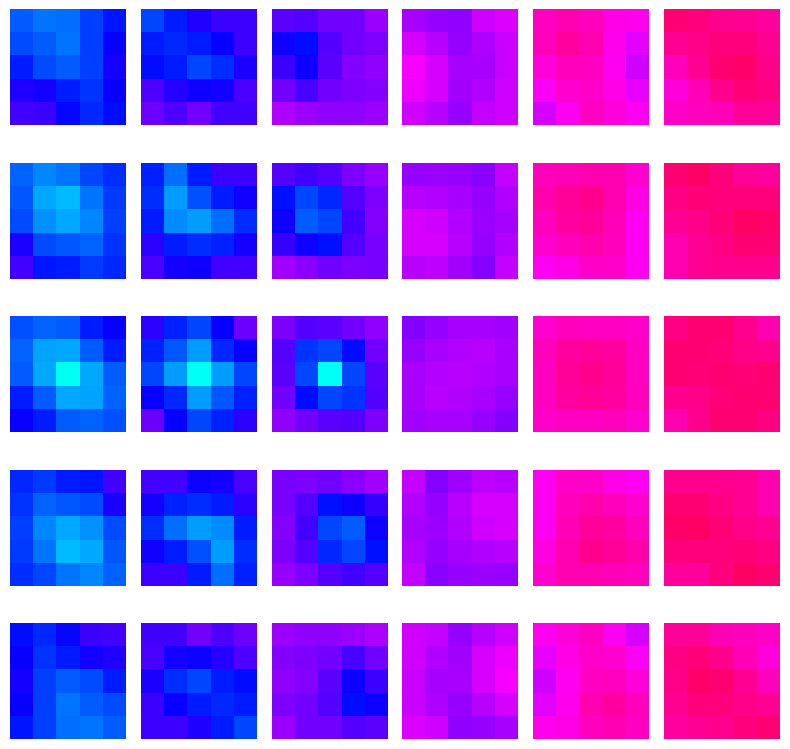

In [9]:
vis(X_train[0])

# Functions for result evaluation / writing predictions

Do not change it!

In [10]:
def test_solution(X_train, y_train, X_val, y_val, feature_num=0):
    assert X_train.shape[-1] <= 300, "Too many features! Should be less than 300"
    assert X_val.shape[-1] <= 300, "Too many features! Should be less than 300"

    model =  LinearRegression().fit(
        X_train,
        y_train[:, feature_num]
    )
    predictions = model.predict(X_val)
    rmse = mean_squared_error(
        predictions,
        y_val[:, feature_num]
    )**.5
    normalized_rmse = rmse * SCALING_WEIGHTS[feature_num]
    print(f"Property #{feature_num}:    raw RMSE={rmse:.6f}")
    print(f"Property #{feature_num}: scaled RMSE={normalized_rmse:.6f}")
    return normalized_rmse.round(6)

# Let's try a baseline solution

In [11]:
def dummy_feature_extractor(X):
    X_new = X.reshape((X.shape[0], -1)) # ravel
    X_new = X_new[:, :300] # pick first 300 features
    X_new = np.stack([x for x in X_new])
    return X_new

In [12]:
X_train = np.concatenate([
    X_train, #123
    np.swapaxes(X_train,1,2), #213
    np.swapaxes(X_train,1,3), #321
    np.swapaxes(X_train,2,3), #132
    np.swapaxes(np.swapaxes(X_train,1,2),2,3), # 231
    np.swapaxes(np.swapaxes(X_train,1,3),2,3), # 312
])

#X_val = np.concatenate([
#    X_val, #123
#    np.swapaxes(X_val,1,2), #213
#    np.swapaxes(X_val,1,3), #321
#    np.swapaxes(X_val,2,3), #132
#    np.swapaxes(np.swapaxes(X_val,1,2),2,3), # 231
#    np.swapaxes(np.swapaxes(X_val,1,3),2,3), # 312
#])

y_train = np.concatenate([y_train] * 6)

In [13]:
import numpy as np
from scipy.stats import skew, kurtosis

def aggregate_features(X):
    # Проверка размерности
    assert X.shape == (5, 5, 5, 6), f"Ожидается shape (5,5,5,6), получено {X.shape}"

    # Глобальные агрегаты по всему массиву
    features = [
        np.mean(X),
        np.std(X),
        np.min(X),
        np.max(X),
        np.sum(X),
        np.median(X),
        skew(X.flatten()),
        kurtosis(X.flatten())
    ]
    
    # Агрегаты по последней оси (например, для каждого "канала")
    for func in [np.mean, np.std, np.min, np.max, np.sum, np.median, skew, kurtosis]:
        agg = func(X, axis=(0,1,2))
        features.extend(agg if isinstance(agg, np.ndarray) else agg.tolist())
    
    # Можно добавить агрегаты по другим осям, если хочется увеличить количество признаков
    
    return np.array(features)

In [14]:
from tqdm.auto import tqdm
#X_train_diff = np.stack([ x / (1 + x.std(1))  for x in X_train])
#X_val_diff = np.stack([ x / (1 + x.std(1))  for x in X_val])
#X_train_diff_raw = X_train_diff.reshape((X_train_diff.shape[0], -1))
#X_val_diff_raw = X_val_diff.reshape((X_val_diff.shape[0], -1))

X_train_raw = X_train.reshape((X_train.shape[0], -1))
X_val_raw = X_val.reshape((X_val.shape[0], -1))

X_train_aggs = np.stack([ aggregate_features(x) for x in tqdm(X_train)])
X_vall_aggs = np.stack([ aggregate_features(x) for x in tqdm(X_val)])

X_train_features = np.stack([np.concatenate([
    x.min(0).min(0).min(0) ,
    x.max(0).max(0).max(0) ,
    np.sqrt(x.max(0).max(0).max(0)),

    x.reshape((-1,6)).std(0),
    x.reshape((-1,6)).var(0),
])for x in X_train])

X_val_features = np.stack([np.concatenate([
    x.min(0).min(0).min(0),
    x.max(0).max(0).max(0),
    np.sqrt(x.max(0).max(0).max(0)),

    x.reshape((-1,6)).std(0),
    x.reshape((-1,6)).var(0),
    #linear_std(x.reshape((-1,6)))
]) for x in X_val])


X_train_shift_raw = X_train_features.reshape((X_train_features.shape[0], -1))
X_val_shift_raw = X_val_features.reshape((X_val_features.shape[0], -1))

  0%|          | 0/12144 [00:00<?, ?it/s]

  0%|          | 0/376 [00:00<?, ?it/s]

In [292]:
from sklearn.ensemble import RandomTreesEmbedding
rte = RandomTreesEmbedding(n_estimators=25,max_depth=3,random_state=56)
X_rte_train = rte.fit_transform(X_train_raw).toarray()
X_rte_val = rte.transform(X_val_raw).toarray()

In [293]:
import numpy as np

def feature_cross_ops(feats):
    n = feats.size
    crossed = []

    for i in range(n):
        for j in range(i+1, n):
            a, b = feats[i], feats[j]
            # Умножение
            crossed.append(a * b)
            # Деление (b!=0, иначе np.nan)
            crossed.append(a / b if b != 0 else 0)
            # Сложение
            #crossed.append(a + b)
            # Вычитание
            #crossed.append(a - b)
    return np.array(crossed)

X_train_features_с = np.stack([feature_cross_ops(x) for x in X_train_shift_raw])
X_val_features_с = np.stack([feature_cross_ops(x) for x in X_val_shift_raw])

In [294]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

class AutoencoderDimReducer:
    def __init__(self, input_dim, latent_dim=10, hidden_dims=(128, 64), 
                 lr=1e-3, epochs=30, batch_size=128, device=None, verbose=1):
        self.input_dim = input_dim
        self.latent_dim = latent_dim
        self.hidden_dims = hidden_dims
        self.lr = lr
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.device = device or ('cuda' if torch.cuda.is_available() else 'cpu')
        self._build_model()
        # Для нормализации
        self.mean_ = None
        self.std_ = None

    def _build_model(self):
        layers = []
        prev_dim = self.input_dim
        for h in self.hidden_dims:
            layers.append(nn.Linear(prev_dim, h))
            layers.append(nn.ReLU())
            prev_dim = h
        layers.append(nn.Linear(prev_dim, self.latent_dim))
        self.encoder = nn.Sequential(*layers)

        layers = []
        prev_dim = self.latent_dim
        for h in reversed(self.hidden_dims):
            layers.append(nn.Linear(prev_dim, h))
            layers.append(nn.ReLU())
            prev_dim = h
        layers.append(nn.Linear(prev_dim, self.input_dim))
        self.decoder = nn.Sequential(*layers)

        self.model = nn.Sequential(self.encoder, self.decoder)
        self.model.to(self.device)

    def _normalize(self, X):
        return (X - self.mean_) / (self.std_ + 1e-8)

    def _denormalize(self, X):
        return X * (self.std_ + 1e-8) + self.mean_

    def fit(self, X):
        X = np.asarray(X, dtype=np.float32)
        self.mean_ = X.mean(axis=0, keepdims=True)
        self.std_ = X.std(axis=0, keepdims=True)
        Xn = self._normalize(X)
        dataset = torch.utils.data.TensorDataset(torch.from_numpy(Xn))
        loader = torch.utils.data.DataLoader(dataset, batch_size=self.batch_size, shuffle=True)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(self.model.parameters(), lr=self.lr)

        self.model.train()
        for epoch in range(self.epochs):
            total_loss = 0
            for batch, in loader:
                batch = batch.to(self.device)
                optimizer.zero_grad()
                outputs = self.model(batch)
                loss = criterion(outputs, batch)
                loss.backward()
                optimizer.step()
                total_loss += loss.item() * batch.size(0)
            if self.verbose and (epoch % 5 == 0 or epoch == self.epochs-1):
                print(f"Epoch {epoch+1}/{self.epochs} Loss: {total_loss / len(X):.6f}")
        return self

    def transform(self, X):
        X = np.asarray(X, dtype=np.float32)
        Xn = self._normalize(X)
        self.encoder.eval()
        with torch.no_grad():
            X_torch = torch.from_numpy(Xn).to(self.device)
            latents = self.encoder(X_torch).cpu().numpy()
        return latents

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

    def inverse_transform(self, Z):
        Z = np.asarray(Z, dtype=np.float32)
        self.decoder.eval()
        with torch.no_grad():
            Z_torch = torch.from_numpy(Z).to(self.device)
            X_rec_n = self.decoder(Z_torch).cpu().numpy()
        X_rec = self._denormalize(X_rec_n)
        return X_rec

In [303]:
from sklearn.decomposition import TruncatedSVD, PCA, KernelPCA, FactorAnalysis,IncrementalPCA
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

train_mats = []
for i,n_feats in enumerate([270,90,20]):
    pca_all = PCA(n_feats, random_state=56)
    X_train_pca = pca_all.fit_transform(np.concatenate([
        X_train_raw,
        X_train_aggs,
        #X_train_features_с
        #X_train_diff_raw,
        #X_train_shift_raw,
    ],axis=-1))
    
    X_vall_pca = pca_all.transform(np.concatenate([
        X_val_raw,
        X_vall_aggs,
        #X_val_features_с
        #X_val_diff_raw,
        #X_val_shift_raw
    ],axis=-1))

    X_train_pca = np.concatenate([X_train_pca,X_train_shift_raw],axis=-1)
    X_vall_pca = np.concatenate([X_vall_pca,X_val_shift_raw],axis=-1)
    if i in [1,2]:
        #q1 = np.quantile(y_train[:,i],0.25)
        #q3 = np.quantile(y_train[:,i],0.75)
        #iqr = (q3 - q1)
        #lower = q1 - 3 * iqr
        #uper = q3 + 3 * iqr
        #mask = ((y_train[:,i] >= lower) & (y_train[:,i] <= uper))
        iso = IsolationForest(n_estimators=500,contamination=0.05, random_state=56)
        y_pred = iso.fit_predict(X_train_pca)
        mask = ((y_train[:,i] <= np.quantile(y_train[:,i],0.995)) & (y_train[:,i] >= np.quantile(y_train[:,i],0.005))) #& (y_pred == 1)
    else:
        mask = np.ones(shape=X_train_pca.shape[0]).astype(bool)
    X_train_pca = X_train_pca[mask]
    
    train_mats.append((X_train_pca, X_vall_pca, y_train[mask]))

In [304]:
#X_vall_pca = np.mean([X_vall_pca[len(y_val)*i:len(y_val)*(i+1)] for i in range(6)],axis=0)

In [305]:
from sklearn.linear_model import Lasso, Ridge
def test_solution(X_train, y_train, X_val, y_val, feature_num=0):
    #X_train = X_train[:,idxes[feature_num]]
    #X_val = X_val[:,idxes[feature_num]]
    assert X_train.shape[-1] <= 300, "Too many features! Should be less than 300"
    assert X_val.shape[-1] <= 300, "Too many features! Should be less than 300"
    model =  LinearRegression().fit(
        X_train,
        y_train[:, feature_num],
    )
    predictions = model.predict(X_val)
    rmse = mean_squared_error(
        predictions,
        y_val[:, feature_num]
    )**.5
    normalized_rmse = rmse * SCALING_WEIGHTS[feature_num]
    print(f"Property #{feature_num}:    raw RMSE={rmse:.6f}")
    print(f"Property #{feature_num}: scaled RMSE={normalized_rmse:.6f}")
    return normalized_rmse.round(6)

In [306]:
%%time
total_score = 0
for feature_number in range(3):
  total_score += test_solution(
      train_mats[feature_number][0],#X_train_pca,#dummy_feature_extractor(X_train),
      train_mats[feature_number][2],#y_train,
      train_mats[feature_number][1],#dummy_feature_extractor(X_val),
      y_val,
      feature_num=feature_number
  )
  print()
total_score /= 3
print('='*16)
print(f"Total score = {total_score:.6f}")

Property #0:    raw RMSE=0.140962
Property #0: scaled RMSE=0.939746

Property #1:    raw RMSE=0.099649
Property #1: scaled RMSE=1.245611

Property #2:    raw RMSE=0.457877
Property #2: scaled RMSE=0.457877

Total score = 0.881078
CPU times: user 1.14 s, sys: 8.99 ms, total: 1.15 s
Wall time: 339 ms


# How to prepare the answer files

In [144]:
def generate_predictions(X_train, y_train, X_test, feature_num=0):
    assert X_train.shape[-1] <= 300
    assert X_test.shape[-1] <= 300

    model =  LinearRegression().fit(
        X_train,
        y_train[:, feature_num]
    )
    predictions = model.predict(X_test)
    return predictions


## Generate solutions and write to the file
combined = {'ID': np.arange(X_test.shape[0])}

for feature_number in range(3):
    predictions = generate_predictions(
        dummy_feature_extractor(X_train),
        y_train,
        dummy_feature_extractor(X_test),
        feature_num=feature_number
    )

    combined[f'y{feature_number+1}'] = predictions

pd.DataFrame(combined).to_csv('predictions.csv', index=False)

In [ ]:
# load the test dataset
#!gdown 1K_KNlfIuusgQjeN3gWJ2htutbO2iX7YE
loaded = pd.read_pickle("ml_data_onsite_final_test.pickle")
X_test_final = loaded['X']['final_test']


# make final predictions
combined = {'ID': np.arange(X_test_final.shape[0])}

for feature_number in range(3):
    predictions = generate_predictions(
        dummy_feature_extractor(X_train),
        y_train,
        dummy_feature_extractor(X_test_final),
        feature_num=feature_number
    )

    combined[f'y{feature_number+1}'] = predictions

pd.DataFrame(combined).to_csv('final_predictions.csv', index=False)